# <font color="red">**Progetto: Classificazione di frutti esotici**</font>

## <font color="orange">**Master in AI Engineering**</font>

## <font color="orange">**Modulo: Machine Learning: Modelli e Algoritmi**</font>

## <font color="orange">**Studente: Giacomo Latini**</font>

## <font color="orange">**Specifiche del Progetto**</font>

TropicTaste Inc., leader nella distribuzione di frutti esotici, intende migliorare l'efficienza e l'accuratezza nel processo di classificazione dei frutti. L'obiettivo è sviluppare un modello di machine learning in grado di predire il tipo di frutto basandosi su caratteristiche numeriche.

L'attuale processo di classificazione dei frutti esotici è manuale e soggetto a errori, risultando inefficiente e dispendioso in termini di risorse. La necessità di un sistema automatizzato e preciso è cruciale per ottimizzare le operazioni aziendali e mantenere alti standard qualitativi.

Implementando un modello di classificazione automatizzato, TropicTaste Inc. potrà:
* **Migliorare l'Efficienza Operativa:** Automatizzare la classificazione ridurrà il tempo e le risorse necessarie, aumentando la produttività.
* **Ridurre gli Errori Umani:** Un modello di machine learning minimizzerà gli errori di classificazione, garantendo una maggiore precisione.
* **Ottimizzare l'Inventario:** Una classificazione accurata permetterà una migliore gestione dell'inventario, assicurando condizioni ottimali di conservazione per ogni tipo di frutto.
* **Aumentare la Soddisfazione del Cliente:** Una corretta identificazione e classificazione dei frutti contribuirà a mantenere elevati standard di qualità, migliorando la soddisfazione dei clienti.

**Dettagli del Progetto:**
* **Dataset**: Utilizzo di un dataset contenente varie caratteristiche numeriche di diversi frutti esotici.
* **Algoritmo**: Implementazione dell'algoritmo K-Nearest Neighbors (KNN) per la classificazione.
* **Output**: Il modello deve predire correttamente il tipo di frutto basandosi sui dati forniti.

**Requisiti del Progetto:**
1. **Preparazione del Dataset:**
* Caricamento e preprocessamento dei dati sui frutti esotici.
* Gestione di eventuali valori mancanti, normalizzazione e scalatura dei dati.
2. **Implementazione del Modello KNN:**
* Sviluppo e addestramento del modello KNN.
* Ottimizzazione dei parametri per migliorare l'accuratezza predittiva.
3. **Valutazione delle Performance:**
* Utilizzo di tecniche di validazione incrociata per valutare la capacità di generalizzazione del modello.
* Calcolo delle metriche di performance, come l'accuratezza e l'errore di classificazione.
4. **Visualizzazione dei Risultati:**
* Creazione di grafici per visualizzare e confrontare le performance del modello.
* Analisi e interpretazione dei risultati per identificare eventuali aree di miglioramento.



### <font color="yellow">**Variabili del Dataset**</font>

Il dataset è scaricabile da qui: https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv

Contiene le seguenti variabili:
* **Frutto:** Il tipo di frutto. Questa è la variabile di destinazione (target) che vogliamo prevedere.
* **Peso (g)**: Il peso del frutto in grammi. Variabile continua.
* **Diametro medio (mm)**: Il diametro medio del frutto in millimetri. Variabile continua.
* **Lunghezza media (mm)**: La lunghezza media del frutto in millimetri. Variabile continua.
* **Durezza buccia (1-10)**: La durezza della buccia del frutto su una scala da 1 a 10. Variabile continua.
* **Dolcezza (1-10)**: La dolcezza del frutto su una scala da 1 a 10. Variabile continua.
* **Acidità (1-10)**: L'acidità del frutto su una scala da 1 a 10. Variabile continua.

Ricorda di eseguire una corretta analisi esplorativa del dataset prima di procedere con il modello. Ricordati anche di applicare il corretto preprocessing ai dati e di misurare le performance del modello secondo le metriche che ritieni più utili.

Accompagna ogni passo dell’analisi con grafici appropriati e commenta adeguatamente ogni passaggio, estraendo degli insight utili all’analisi e alla comprensione dell’informazione trasmessa dal dato.

## <font color="orange">**Soluzione**</font>

### <font color="yellow">**Import**</font>

Definizione delle **Librerie + eventuali Moduli**, con relative classi e funzioni:
* La funzione **train_test_split** verrà usata per l'applicazione della tecnica di Cross Validation 'Hold-Out', per la suddivisione del dataset in set di addestramento e test
* La classe **MinMaxScaler** verrà usata per l'implementazione della tecnica di Feature Scaling 'Normalizzazione', portando i valori su una scala tra 0 e 1
* La funzione **label_binarize** verrà usata per trasformare le etichette multi-classe in binarie
* La classe **GridSearchCV** verrà utilizzata per automatizzare la ricerca dei migliori iperparametri del modello K-NN, tramite cross-validation
* La classe **StratifiedKFold** verrà utilizzata come metodo di suddivisione all'interno della classe GridSearchCV, per garantire una validazione incrociata stratificata con mescolamento casuale (shuffle) e riproducibilità dei dati (random_state)
* La classe **KNeighborsClassifier** verrà usata per la creazione del modello K-NN e suo relativo addestramento
* Le funzioni **accuracy_score**, **log_loss**, **classification_report**, **confusion_matrix**, **RocCurveDisplay**, **roc_curve** e **auc** verranno usate per ritornare le metriche di performance:
  * *accuracy_score*: indica la percentuale di classificazioni corrette
  * *log_loss*: rappresenta la funzione di costo per misurare la qualità delle probabilità predette dal modello
  * *classification_report*: report con le principali metriche di classificazione quali precision, recall, f1-score ed accuracy
  * *confusion_matrix*: matrice di confusione con gli errori (sia quali che quanti) che ha commesso il modello
  * *RocCurveDisplay*: permette di visualizzare la curva ROC
  * *roc_curve*: permette di eseguire la Receiver Operating Characteristic (ROC)
  * *auc*: permette di eseguire l'Area Under the Curve (AUC)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix, RocCurveDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Definizione delle **Costanti**:
* RANDOM_SEED=0: costante che verrà passata al parametro random_state, per la generazione di dati casuali
* BASE_PATH: percorso (url) al dataset di riferimento

In [ ]:
RANDOM_SEED = 0
BASE_PATH = "https://proai-datasets.s3.eu-west-3.amazonaws.com/"

### <font color="yellow">**Preparazione del Dataset**</font>

**Caricamento del dataset** chiamato "fruits.csv", tramite la funzione read_csv() della libreria Pandas, dove:
* la variabile *Frutto* indica la variabile target (variabile dipendente)
* tutte le altre variabili (*Peso (g)*, *Diametro medio (mm)*, *Lunghezza media (mm)*, *Durezza buccia (1-10)*, *Dolcezza (1-10)*, *Acidità (1-10)*) rappresentano le features (variabili indipendenti)

In [ ]:
df_fruits = pd.read_csv(BASE_PATH + "fruits.csv")
df_fruits.head(len(df_fruits))

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,Mela,86.40,89.68,8.69,9.61,2.41
1,Mela,77.58,73.45,6.49,7.20,3.87
2,Mela,81.95,81.66,6.40,9.09,2.88
3,Mela,66.33,36.71,6.78,8.21,2.55
4,Mela,56.73,75.69,5.78,9.15,3.88
...,...,...,...,...,...,...
495,Kiwi,40.82,67.52,7.39,7.28,5.56
496,Kiwi,54.65,62.95,7.06,6.47,4.68
497,Kiwi,35.70,71.43,7.64,9.75,4.36
498,Kiwi,30.80,65.23,5.91,7.65,4.13


Tramite le funzioni *df_fruits.info()*, *df_fruits.isna().sum()* e *df_fruits["Frutto"].unique()* si è potuto notare che:
* tutte le variabili del dataset non hanno valori nulli (o valori mancanti), quindi non bisognerà applicare la rimozione di righe/colonne o imputazione (detta anche sostituzione)
* la variabile target *Frutto*, essendo di tipo object, è una variabile qualitativa (o categoriale), quindi su di essa bisognerà applicare Feature Encoding prima dell'addestramento, dato che i valori sono: 'Mela', 'Banana', 'Arancia', 'Uva' e 'Kiwi'

In [ ]:
print(df_fruits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Frutto                 500 non-null    object 
 1   Peso (g)               500 non-null    float64
 2   Diametro medio (mm)    500 non-null    float64
 3   Lunghezza media (mm)   500 non-null    float64
 4   Durezza buccia (1-10)  500 non-null    float64
 5   Dolcezza (1-10)        500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB
None


In [ ]:
print(df_fruits.isna().sum())

Frutto                   0
Peso (g)                 0
Diametro medio (mm)      0
Lunghezza media (mm)     0
Durezza buccia (1-10)    0
Dolcezza (1-10)          0
dtype: int64


Applicando la funzione unique() alla Series Frutto, si è potuto notare che i valori unici sono: 'Mela', 'Banana', 'Arancia', 'Uva' e 'Kiwi'. Quindi su questa variabile bisognerà applicare la tecnica di Feature Encoding chiamata **Label Encoding**, che permetterà di mappare ogni etichetta ad un rispettivo valore numerico.

NB: Anche se la variabile target Frutto è una variabile qualitativa non ordinata (o sconnessa), bisognerà applicare ugualmente Label Encoding poichè nelle fasi successive si dovrà avere per l'insieme di target y un vettore (o array numpy monodimensionale) e quindi l’algoritmo K-NN guarda quale etichetta è più presente tra i vicini (k neighbors) per fare la predizione

In [ ]:
print(df_fruits["Frutto"].unique())

['Mela' 'Banana' 'Arancia' 'Uva' 'Kiwi']


Andiamo a codificare la variabile target Frutto con i valori numerici, cioè: 'Mela'->0, 'Banana'->1, 'Arancia'->2, 'Uva'->3, 'Kiwi'->4, tramite **Feature Encoding->Label Encoding** con Pandas

In [ ]:
# creazione della mappa, dove ogni coppia chiave-valore rappresenta l'etichetta e suo relativo valore numerico da associargli
map_dict = {"Mela": 0, "Banana": 1, "Arancia": 2, "Uva": 3, "Kiwi": 4}

# tramite la funzione anonima lambda andiamo a prendere ogni valore della Series df_fruits["Frutto"] e lo codifichiamo con i valori numerici definiti all'interno del dizionario
df_fruits["Frutto"] = df_fruits["Frutto"].map(lambda x: map_dict[x])

In [ ]:
df_fruits.head(len(df_fruits))

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,0,86.40,89.68,8.69,9.61,2.41
1,0,77.58,73.45,6.49,7.20,3.87
2,0,81.95,81.66,6.40,9.09,2.88
3,0,66.33,36.71,6.78,8.21,2.55
4,0,56.73,75.69,5.78,9.15,3.88
...,...,...,...,...,...,...
495,4,40.82,67.52,7.39,7.28,5.56
496,4,54.65,62.95,7.06,6.47,4.68
497,4,35.70,71.43,7.64,9.75,4.36
498,4,30.80,65.23,5.91,7.65,4.13


Da notare che la distribuzione delle osservazioni è uniforme su ciascuna classe, cioè 100 osservazioni su ciascuna classe

In [ ]:
print(df_fruits["Frutto"].value_counts())

Frutto
0    100
1    100
2    100
3    100
4    100
Name: count, dtype: int64


**Grafici per visualizzare la distribuzione delle feature**

**Analisi delle Distribuzioni delle Feature:**
* Variabile *Peso (g)*: Ha una distribuzione asimmetrica verso destra (o anche detta distribuzione asimmetrica positiva), con dati maggiormente distribuiti verso sinistra (infatti la maggior parte dei frutti ha un peso minore di 50g)
* Variabile *Diametro medio (mm)*: Ha una distribuzione bimodale con due picchi evidenti, un picco intorno a circa 70mm ed un picco oltre 150mm, dove questo indica la presenza di due gruppi distinti di frutti
* Variabile *Lunghezza media (mm)*: Ha una distribuzione bimodale, con un gruppo intorno a 2-4mm ed un altro gruppo intorno a 6-8mm, e questo può riflettere differenze strutturali tra i tipi di frutta
* Variabile *Durezza buccia (1-10)*: Ha una distribuzione gaussiana, con mediana intorno a 7. Tuttavia, si osservano alcuni valori oltre il range previsto (>10), che andrebbero verificati
* Variabile *Dolcezza (1-10)*: Ha una distribuzione asimmetrica verso destra (o anche detta distribuzione asimmetrica positiva), con dati maggiormente distribuiti tra 2-4

In [ ]:
def plot_distribution_feature(df_fruits):

  """
  parametri:
    - df_fruits: dataframe contenente i dati del dataset
  output: plot delle distribuzioni delle feature
  """

  plt.figure(figsize=(13, 7))

  # itera su ogni feature (esclusa la variabile target Frutto), mostrando il relativo istogramma
  for i, col in enumerate(df_fruits.columns[1:]):
      # plt.subplot crea un layout dove in una figura vengono inseriti più grafici
      # numero_righe=2, numero_colonne=3, posizione del grafico=i+1
      plt.subplot(2, 3, i+1)
      # creazione di un istogramma, cioè un grafico che mostra la distribuzione di una variabile continua
      # kde=True: mostra la curva KDE (stima della densità) sovrapposta all’istogramma
      sns.histplot(df_fruits[col], kde=True, color='lightgreen')
      # titolo sul grafico
      plt.title(f'Distribuzione della feature: {col}')
      # etichetta sull'asse delle x del grafico
      plt.xlabel(col)

  # plt.tight_layout regola il padding tra e intorno ai subplots
  plt.tight_layout()
  plt.show()

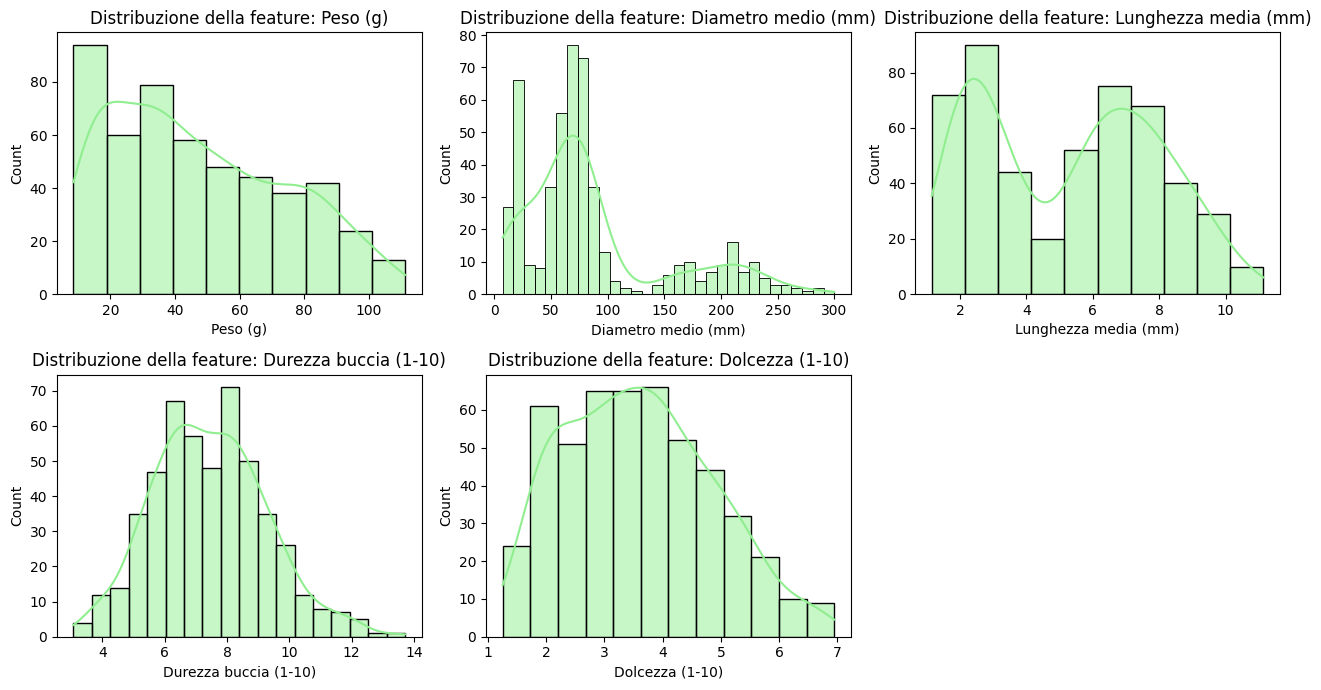

In [ ]:
plot_distribution_feature(df_fruits)

Per verificare se ci sono valori fuori dal range (1, 10) nelle feature con scala fissa, ho controllato il valore minimo e massimo delle variabili *Durezza buccia (1-10)* e *Dolcezza (1-10)*

In [ ]:
for col in df_fruits[['Durezza buccia (1-10)', 'Dolcezza (1-10)']]:
    print(f"{col} - Min: {df_fruits[col].min()}, Max: {df_fruits[col].max()}")

Durezza buccia (1-10) - Min: 3.07, Max: 13.72
Dolcezza (1-10) - Min: 1.25, Max: 6.95


Dall'output si è notato che la variabile continua *Dolcezza (1-10)* non ha valori inferiori a 1 e superiori a 10, mentre la variabile continua *Durezza buccia (1-10)* ha valori > 10, quindi applicare la funzione *median* sulla Series df_fruits['Durezza buccia (1-10)'], sostituendo tali valori con quello della mediana, usando la funzione loc

In [ ]:
# calcolo della mediana
median_buccia = df_fruits['Durezza buccia (1-10)'].median()

# sostituzione dei valori superiori a 10 con la mediana
# tramite loc è possibile selezionare direttamente i valori della condizione 'Durezza buccia (1-10)'>10 e sostituirli con il valore mediano
# df_fruits['Durezza buccia (1-10)'] > 10 -> creazione della maschera
# .loc[..., 'Durezza buccia (1-10)'] = median_buccia -> selezione delle righe in cui la condizione è True e rispetto alla colonna Durezza buccia (1-10) sostituzione dei valori con quelli della variabile median_buccia
df_fruits.loc[df_fruits['Durezza buccia (1-10)'] > 10, 'Durezza buccia (1-10)'] = median_buccia

Conferma della correzione con un nuovo controllo

In [ ]:
print("Valore minimo e massimo della variabile Durezza buccia (1‑10), dopo aver sostituito i valori>10 con quello della mediana:")
print(f"Min: {df_fruits['Durezza buccia (1-10)'].min()}, Max: {df_fruits['Durezza buccia (1-10)'].max()}")

Valore minimo e massimo della variabile Durezza buccia (1‑10), dopo aver sostituito i valori>10 con quello della mediana:
Min: 3.07, Max: 9.97


Andiamo a selezionare con le variabili X e y:
* X: insieme delle feature (array numpy bidimensionale)
* y: insieme di target (array numpy monodimensionale)

In [ ]:
# rimozione della variabile target Frutto e conversione del dataframe in un array numpy bidimensionale
X = df_fruits.drop("Frutto", axis=1).values
# dalla Series con variabile target Frutto, conversione in array numpy monodimensionale
y = df_fruits["Frutto"].values

In [ ]:
print(f"shape dell'insieme delle feature X: {X.shape}")
print(f"shape dell'insieme di target y: {y.shape}")

shape dell'insieme delle feature X: (500, 5)
shape dell'insieme di target y: (500,)


### <font color="yellow">**Suddivisione del dataset in set di train e test + Normalizzazione**</font>

Applicazione della tecnica di Cross Validation **Hold-Out**, suddividendo il dataset in due set, utilizzando la funzione train_test_split del modulo sklearn.model_selection, con:
* X_train, X_test: insieme delle feature per l'addestramento e test, con l'80% di samples (o osservazioni)
* y_train, y_test: insieme di target per l'addestramento e test, con il 20% di samples (o osservazioni)

In [ ]:
# X->insieme delle feature, y->insieme di target, test_size=0.2->percentuale di pesi (20%) che si vogliono associare al test_set, random_state=RANDOM_SEED(=0)->numero di dati riproducibili
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
print(f"shape del set di feature, per il train: {X_train.shape}")
print(f"shape del set di target, per il train: {y_train.shape}")
print(f"shape del set di feature, per il test: {X_test.shape}")
print(f"shape del set di target, per il test: {y_test.shape}")

shape del set di feature, per il train: (400, 5)
shape del set di target, per il train: (400,)
shape del set di feature, per il test: (100, 5)
shape del set di target, per il test: (100,)


Applicazione della **Normalizzazione** sulle feature dei set di addestramento e test, portando i valori su una scala tra 0 e 1 usando il Trasformatore MinMaxScaler(), del modulo sklearn.preprocessing

In [ ]:
# istanziazione dell'oggetto mms, della classe MinMaxScaler()
mms = MinMaxScaler()
# sulle feature del set di addestramento, calcolo dei parametri per la trasformazione (fit) e applicazione della normalizzazione (transform), portando i valori su una scala di valori tra 0 e 1
X_train = mms.fit_transform(X_train)
# sulle feature del set di test, applicazione solo della normalizzazione (transform), poichè il calcolo dei parametri lo si effettua solo sulle feature del set di addestramento
X_test = mms.transform(X_test)

In [ ]:
print("Valore minimo nel set di feature, per il train:", X_train.min())
print("Valore massimo nel set di feature, per il train:", X_train.max())
print("Valore minimo nel set di feature, per il test:", X_test.min())
print("Valore massimo nel set di feature, per il test:", X_test.max())

Valore minimo nel set di feature, per il train: 0.0
Valore massimo nel set di feature, per il train: 1.0000000000000002
Valore minimo nel set di feature, per il test: 0.012826652072786972
Valore massimo nel set di feature, per il test: 1.0160427807486632


### <font color="yellow">**Implementazione dell'Algoritmo K-NN e Valutazione delle Performance**</font>

La classe **GridSearchCV** l'ho utilizzata per identificare il valore ottimale degli iperparametri da testare, nel mio caso per il modello K-NN, tramite una procedura automatizzata di Cross Validation. In particolare:
* Si definisce una griglia di iperparametri da testare per il modello K-NN, come l'ipeparametro n_neighbors (cioè l'iperparametro k)
* Per ciascun valore dell'iperparametro n_neighbors, GridSearchCV esegue una Stratified K-Fold Cross Validation con n_splits=5, tramite la classe StratifiedKFold, per garantire che la distribuzione delle classi sia bilanciata in ogni fold
  * L'uso di shuffle=True è fondamentale perché il dataset originale, come osservato con df_fruits.head(len(df_fruits)), è ordinato per etichetta, il che causerebbe una suddivisione sbilanciata nei fold se si usasse un K-Fold classico senza shuffle: i fold conterrebbero solo una classe, dato che con l'Hold-Out si sono ottenute 400 osservazioni sul train e 100 osservazioni sul test. Questo porterebbe a risultati con un alto rischio di overfitting
  * L’aggiunta di random_state assicura la riproducibilità del processo di validazione
* Al termine della procedura, GridSearchCV restituisce la combinazione di iperparametri che hanno ottenuto le migliori prestazioni medie nei 5 round di validazione, secondo le metriche specificate (cioè accuracy e log_loss)

Link documentazione:
* GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* StratifiedKFold: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [ ]:
def GridSearchCrossValidation(estimator_knn, param_grid_knn, data):

  """
  parametri:
    - estimator_knn: modello K-NN istanziato
    - param_grid_knn: dizionario con gli iperparametri da testare per il modello K-NN
    - data: tupla contenente il set di feature e target
  output: valori ottimali degli iperparametri da passare al modello K-NN
  """

  # estrazione del set di feature e target, dalla tupla
  X, y = data

  # implementazione della classe GridSearchCV
  grid_search = GridSearchCV(
      estimator=estimator_knn, # estimator: stimatore (nel nostro caso la classe KNeighborsClassifier, per la creazione del modello K-NN)
      param_grid=param_grid_knn, # param_grid: dizionario con gli iperparametri da passare allo stimatore
      scoring={'accuracy': 'accuracy', 'neg_log_loss': 'neg_log_loss'}, # scoring: dizionario con le metriche
      refit='accuracy', # refit: indica quale metrica usare per selezionare il miglior modello
      cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED), # Stratified K-Fold Cross Validation con numero di batch=5, mescolamento dei dati(shuffle) attivo e riproducibilità dei dati con random_state
      return_train_score=True, # return_train_score: se True, permette di ritornare i risultati anche dell'addestramento
      n_jobs=-1 # n_jobs: numero di jobs da eseguire in parallelo, dove impostando -1 si velocizza il tempo di addestramento
    )

  # addestramento del modello
  grid_search.fit(X, y)

  # risultati
  # attributo best_params_: dizionario con la combinazione di iperparametri che ha ottenuto le migliori performance
  # attributo best_score_: miglior punteggio medio ottenuto nella Stratified K-Fold Cross Validation, in base alla metrica selezionata con refit (cioè l'accuracy)
  # attributo cv_results_: dizionario con le chiavi come intestazioni di colonna(headers) e i valori come colonne, che può essere importato in un DataFrame Pandas
  print("Migliore combinazione di iperparametri:", grid_search.best_params_)
  print("Migliore score (accuracy):", grid_search.best_score_, "\n")
  cv_results = pd.DataFrame(grid_search.cv_results_)[['param_n_neighbors', 'mean_train_accuracy', 'mean_test_accuracy', 'mean_train_neg_log_loss', 'mean_test_neg_log_loss']]
  # portare con segno positivo i valori della log loss, dato che con la metrica neg_log_loss i valori sono con segno negativo
  cv_results['mean_test_neg_log_loss'] = -1*cv_results['mean_test_neg_log_loss']
  cv_results['mean_train_neg_log_loss'] = -1*cv_results['mean_train_neg_log_loss']
  print(cv_results)

Tramite GridSearchCV, con Stratified K-Fold Cross Validation, è emerso che n_neighbors=10 massimizza l’accuracy media, risultando il valore ottimale per il modello K-NN

In [ ]:
# creazione del modello
knn = KNeighborsClassifier()

# dizionario con i nomi degli iperparametri dello stimatore
param_grid={'n_neighbors': [1,2,3,4,5,7,10,12,15,20,30,40,50]}

# invocazione della funzione GridSearchCrossValidation
GridSearchCrossValidation(knn, param_grid, (X_train, y_train))

Migliore combinazione di iperparametri: {'n_neighbors': 10}
Migliore score (accuracy): 0.9275 

    param_n_neighbors  mean_train_accuracy  mean_test_accuracy  \
0                   1             1.000000              0.8975   
1                   2             0.968750              0.9000   
2                   3             0.960000              0.9200   
3                   4             0.951875              0.9175   
4                   5             0.945625              0.9250   
5                   7             0.943125              0.9250   
6                  10             0.936875              0.9275   
7                  12             0.936250              0.9250   
8                  15             0.938125              0.9250   
9                  20             0.933125              0.9275   
10                 30             0.929375              0.9275   
11                 40             0.931875              0.9150   
12                 50             0.929375    

Andiamo a riaddestrare il modello K-NN, passandogli come iperparametro n_neighbors=10 (cioè l'iperparametro k=10) e invochiamo la funzione classifier_report, che effettua la previsione del modello e la visualizzazione delle metriche di classificazione. Infatti dalle metriche di classificazione, possiamo notare un'accuracy dell'88%

In [ ]:
def classifier_report(model, data):

  """
  parametri:
    - model: modello K-NN
    - data: tupla contenente il set di feature e target
  output: report con le metriche di classificazione
  """

  # estrazione dei dati (feature e target) dalla tupla
  X, y = data
  # previsione del modello
  y_pred = model.predict(X)
  # invocazione della funzione classification_report, passandogli come parametri sia il set di target predetti che reali
  report = classification_report(y_pred, y)
  print(report)

In [ ]:
# creazione del modello
# parametro n_neighbors(iperparametro k): 10
# parametro algorithm='auto' (valore di default): scelta dell'algoritmo per cercare i k più prossimi rispetto all'osservazione che si vuole classificare
# parametro p=2 (valore di default): scelta della distanza, con p che indica il parametro che permette di controllare il peso da dare alle distanze maggiori su determinate dimensioni
knn = KNeighborsClassifier(n_neighbors=10)

# addestramento del modello, sui dati di addestramento
knn.fit(X_train, y_train)

# invocazione della funzione classifier_report
classifier_report(knn, (X_test, y_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       1.00      1.00      1.00        19
           2       0.76      0.76      0.76        21
           3       1.00      1.00      1.00        25
           4       0.78      0.74      0.76        19

    accuracy                           0.88       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.88      0.88       100



### <font color="yellow">**Visualizzazione dei Risultati**</font>

#### <font color="green">**Matrice di Confusione per visualizzare e confrontare le performance del modello**</font>

Tramite la metrica di classificazione *Matrice di Confusione* è possibile sapere non solo quanti errori ha commesso il modello, ma anche quali. Riassume quindi le performance del modello. Si utilizza la funzione *confusion_matrix*, del modulo sklearn.metrics, applicandola sulle classi

In [ ]:
def plot_confusion_matrix(model, data):

  """
  parametri:
    - model: modello K-NN
    - data: tupla contenente il set di feature e target
  output: matrice di confusione
  """

  # estrazione dei dati (feature e target) dalla tupla
  X, y = data

  # previsione del modello
  y_pred = model.predict(X)

  # definizione della matrice di confusione, passando alla funzione due parametri: set di target reali e predetti
  cm = confusion_matrix(y, y_pred)

  # lista con le etichette reali da passare alle classi predette e reali nell'heatmap
  label_names = ["Mela", "Banana", "Arancia", "Uva", "Kiwi"]

  # con seaborn.heatmap è possibile visualizzare a livello grafico la matrice di confusione e i valori di True Positive, True Negative, False Positive e False Negative
  # fmt='d' permette di evitare i float
  sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', xticklabels=label_names, yticklabels=label_names)
  plt.title("Matrice di Confusione")
  plt.ylabel("Classe Reale")
  plt.xlabel("Classe Predetta")
  plt.show()

Nel caso dei dati del set di addestramento si può notare che la matrice di confusione multi-classe=5 è ben distribuita, con valori elevati sulla diagonale, dove le predizioni sono corrette e relativamente pochi errori fuori diagonale:

* *True Positive*->Osservazioni positive, classificate come positive:
  * *Classe Mela* ([0,0]): 79
  * *Classe Banana* ([1,1]): 81
  * *Classe Arancia* ([2,2]): 68
  * *Classe Uva* ([3,3]): 75
  * *Classe Kiwi* ([4,4]): 72
* *False Negative*->Osservazioni positive, ma classificate come negative:
  * *Classe Mela* ([0,1], [0,2], [0,3], [0,4]): 0, 2, 0, 2
  * *Classe Banana* ([1,0], [1,2], [1,3], [1,4]): 0, 0, 0, 0
  * *Classe Arancia* ([2,0], [2,1], [2,3], [2,4]): 5, 0, 0, 6
  * *Classe Uva* ([3,0], [3,1], [3,2], [3,4]): 0, 0, 0, 0
  * *Classe Kiwi* ([4,0], [4,1], [4,2], [4,3]): 1, 0, 9, 0
* *False Positive*->Osservazioni negative, ma classificate come positive:
  * *Classe Mela* ([1,0], [2,0], [3,0], [4,0]): 0, 5, 0, 1
  * *Classe Banana* ([0,1], [2,1], [3,1], [4,1]): 0, 0, 0, 0
  * *Classe Arancia* ([0,2], [1,2], [3,2], [4,2]): 2, 0, 0, 9
  * *Classe Uva* ([0,3], [1,3], [2,3], [4,3]): 0, 0, 0, 0
  * *Classe Kiwi* ([9,4], [1,4], [2,4], [3,4]): 2, 0, 6, 0
* *True Negative*->Osservazioni negative, classificate come negative, dove i valori sono tutti tranne:
  * il valore nella posizione [i,i] del True Positive t.c. i={0,1,2,3,4}
  * la riga i-esima che indica i valori False Negative t.c. i={0,1,2,3,4}
  * la colonna i-esima che indica i valori False Positive t.c. i={0,1,2,3,4}

NB: Mela->0, Banana->1, Arancia->2, Uva->3, Kiwi->4

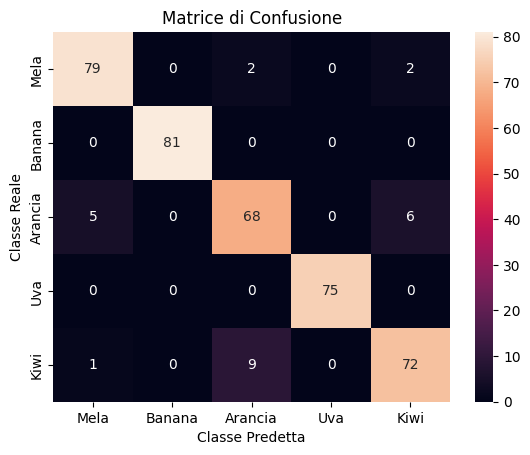

In [ ]:
plot_confusion_matrix(knn, (X_train, y_train))

Nel caso dei dati del set di test si può notare che la matrice di confusione multi-classe=5 è ben distribuita, con valori elevati sulla diagonale, dove le predizioni sono corrette e relativamente pochi errori fuori diagonale:

* *True Positive*->Osservazioni positive, classificate come positive:
  * *Classe Mela* ([0,0]): 14
  * *Classe Banana* ([1,1]): 19
  * *Classe Arancia* ([2,2]): 16
  * *Classe Uva* ([3,3]): 25
  * *Classe Kiwi* ([4,4]): 14
* *False Negative*->Osservazioni positive, ma classificate come negative:
  * *Classe Mela* ([0,1], [0,2], [0,3], [0,4]): 0, 1, 0, 2
  * *Classe Banana* ([1,0], [1,2], [1,3], [1,4]): 0, 0, 0, 0
  * *Classe Arancia* ([2,0], [2,1], [2,3], [2,4]): 2, 0, 0, 3
  * *Classe Uva* ([3,0], [3,1], [3,2], [3,4]): 0, 0, 0, 0
  * *Classe Kiwi* ([4,0], [4,1], [4,2], [4,3]): 0, 0, 4, 0
* *False Positive*->Osservazioni negative, ma classificate come positive:
  * *Classe Mela* ([1,0], [2,0], [3,0], [4,0]): 0, 2, 0, 0
  * *Classe Banana* ([0,1], [2,1], [3,1], [4,1]): 0, 0, 0, 0
  * *Classe Arancia* ([0,2], [1,2], [3,2], [4,2]): 1, 0, 0, 4
  * *Classe Uva* ([0,3], [1,3], [2,3], [4,3]): 0, 0, 0, 0
  * *Classe Kiwi* ([9,4], [1,4], [2,4], [3,4]): 2, 0, 3, 0
* *True Negative*->Osservazioni negative, classificate come negative, dove i valori sono tutti tranne:
  * il valore nella posizione [i,i] del True Positive t.c. i={0,1,2,3,4}
  * la riga i-esima che indica i valori False Negative t.c. i={0,1,2,3,4}
  * la colonna i-esima che indica i valori False Positive t.c. i={0,1,2,3,4}

NB: Mela->0, Banana->1, Arancia->2, Uva->3, Kiwi->4

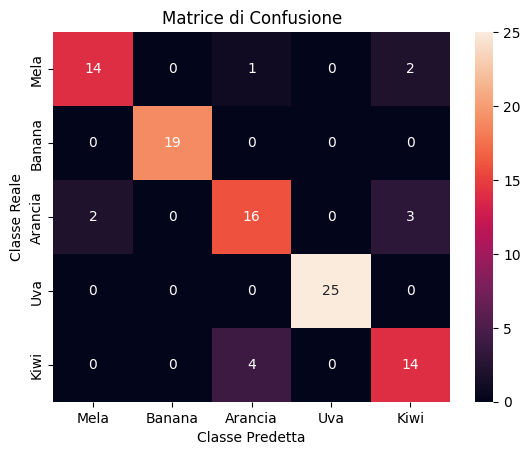

In [ ]:
plot_confusion_matrix(knn, (X_test, y_test))

#### <font color="green">**Curva ROC per visualizzare e confrontare le performance del modello**</font>

La Curva ROC (Receiver Operating Characteristic) è una metrica utilizzata per valutare le prestazioni di un modello di classificazione, come nel nostro caso il modello K-Nearest Neighbors (K-NN). Essa rappresenta la relazione tra il Tasso di Veri Positivi (True Positive Rate, TPR, anche noto come Recall, ovvero la percentuale di osservazioni positive correttamente classificate) e il Tasso di Falsi Positivi (False Positive Rate, FPR, calcolato come 1 − Specificity, dove la Specificity indica la percentuale di osservazioni negative correttamente classificate).

La Curva ROC consente di verificare le performance di un modello di classificazione per diversi valori di soglia (o threshold) ed è utilizzata per calcolare il valore dell’AUC (Area Under the Curve), che rappresenta l’area sotto la curva ROC. Il punteggio AUC varia tra 0 e 1: un valore prossimo a 1 indica un’elevata capacità di discriminazione del modello.

Sebbene la Curva ROC sia tipicamente impiegata per modelli di classificazione binaria, è possibile adattarla a contesti multiclasse (come nel nostro caso, in cui il target include cinque classi) utilizzando l’approccio One-vs-Rest. In particolare, si applica la funzione label_binarize per trasformare il target multiclasse in una serie di classificazioni binarie, una per ciascuna classe. Successivamente, per ogni classe, si calcolano i valori di TPR e FPR tramite la funzione roc_curve ed infine si determina l’AUC corrispondente, tramite la funzione auc

Fonte: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#plot-all-ovr-roc-curves-together

In [ ]:
def plot_roc_curve(model, data):

  """
  parametri:
    - model: modello K-NN
    - data: tupla contenente il set di feature e target
  output: curva ROC e calcolo dell'AUC per ciascuna classe del modello K-NN
  """

  # estrazione dei dati (feature e target) dalla tupla
  X, y = data

  # probabilità del modello
  y_proba = knn.predict_proba(X_test)

  # label_binarize: binarizzare le etichette vere per lo schema one-vs-rest
  y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
  n_classes = y_test_bin.shape[1]

  # esecuzione della curva ROC e AUC per ogni classe
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      # roc_curve: permette di eseguire la Receiver operating characteristic (ROC), ritornando il valore del FPR e TPR
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
      # auc: permette di eseguire l'Area Under the Curve (AUC), passando alla funzione i valori del FPR e TPR
      roc_auc[i] = auc(fpr[i], tpr[i])

  # grafico a linee per tutte le curve ROC, una per ogni classe
  fig, ax = plt.subplots(figsize=(6, 6))
  # lista con i colori da passare a ciascuna classe
  colors = ['firebrick', 'gold', 'orange', 'rebeccapurple', 'chartreuse']
  # lista con le etichette reali
  class_names = ["Mela", "Banana", "Arancia", "Uva", "Kiwi"]
  for class_id, color in zip(range(n_classes), colors):
      # RocCurveDisplay: permette di visualizzare la curva ROC
      RocCurveDisplay.from_predictions(
          y_test_bin[:, class_id],
          y_proba[:, class_id],
          name=f"Curva ROC per la classe {class_names[class_id]}",
          color=color,
          ax=ax,
      )

La figura mostra le Curve ROC per ciascuna delle cinque classi del modello K-NN, utilizzando l’approccio One-vs-Rest per l’adattamento della metrica ROC ad un contesto multiclasse.

Le Curve ROC mostrano un elevato potere discriminativo del modello per tutte le classi, con valori AUC molto vicini a 1. Questo indica che il modello è in grado di distinguere correttamente ciascuna classe dalle altre in quasi tutti i casi, con un tasso di Falsi Positivi molto basso e un tasso di Veri Positivi molto alto.

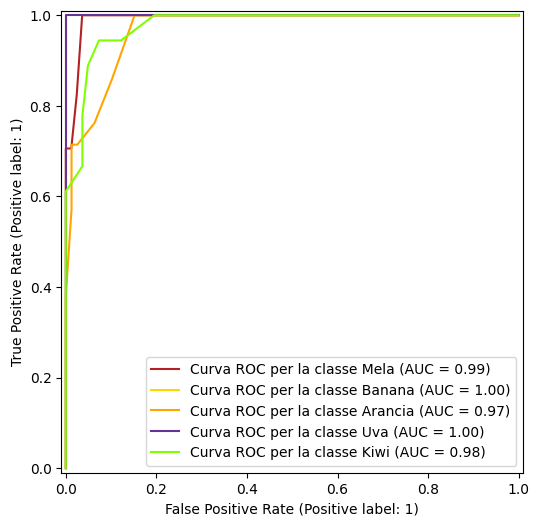

In [ ]:
plot_roc_curve(knn, (X_test, y_test))

#### <font color="green">**Analisi e interpretazione dei risultati**</font>

Definizione della funzione kneighbors_observation, dove passata l'**osservazione da classificare** possiamo vedere i suoi **k=10 neighbors**, usando la funzione **modello_knn.kneighbors**, dove si ottengono due array numpy bidimensionali:
* il primo array numpy bidimensionale contiene la distanza dall'osservazione ai k=10 neighbors
* il secondo array bidimensionale contiene gli indici dei neighbors, nell'array che abbiamo usato nell'addestramento (X_train)

In [ ]:
def kneighbors_observation(model, x):

  """
  parametri:
    - model: modello K-NN
    - x: osservazione da classificare
  output:
    - distance_neighbors: array numpy bidimensionale contenente la distanza dall'osservazione ai neighbors
    - index_neighbors: array numpy bidimensionale contenente gli indici dei neighbors, nell'array che abbiamo usato nell'addestramento (X_train)
  """

  # con la funzione kneighbors possiamo ritornare la distanza dall'osservazione ai suoi k vicini e i loro relativi indici
  distance_neighbors, index_neighbors = model.kneighbors(x)

  # previsione del modello, per vedere a quale classe appartiene l'osservazione da classificare
  y_pred = model.predict(x)
  # probabilità del modello, per vedere i k-neighbors a quali classi appartengono
  y_proba = model.predict_proba(x)

  print(f"diatance_neighbors: {distance_neighbors}\n")
  print(f"index_neighbors: {index_neighbors}\n")
  print(f"y_pred: {y_pred}\n")
  print(f"y_proba: {y_proba}")

  return distance_neighbors, index_neighbors

Definizione della funzione plot_kneighbors, per la visualizzazione dei k neighbors sul grafico di dispersione (o scatterplot)

In [ ]:
def plot_kneighbors(feature_x, feature_y, x, k_neighbors, X_train):

  """
  parametri:
    - feature_x: indice della feature da visualizzare sull'asse x
    - feature_y: indice della feature da visualizzare sull'asse y
    - x: osservazione da classificare
    - k_neighbors: k_neighbors rispetto all'osservazione da classificare
    - X_train: feature del set di addestramento
  output: scatterplot con i k-neighbors
  """

  # scatterplot con le feature del set di addestramento
  plt.scatter(X_train[:, feature_x], X_train[:, feature_y], c=y_train, label='Training data')

  # scatterplot con il punto x da classificare
  plt.scatter(x[0, feature_x], x[0, feature_y], c='orange', label='Test point')

  # visualizzazione dei neighbors
  plt.scatter(k_neighbors[:, feature_x], k_neighbors[:, feature_y], facecolors='none', edgecolors='red', label='Neighbors')

  # leggenda ed etichette
  plt.legend()
  plt.title("Visualizzazione dei K-neighbors (k=10)")
  plt.xlabel(f"Feature {feature_x}")
  plt.ylabel(f"Feature {feature_y}")
  plt.show()

Dall'output della funzione possiamo notare che:
* l'osservazione che vogliamo classificare appartiene alla classe #3 ('Uva')
* si hanno circa il 10% di neighbors sulla classe #1 ('Banana') e circa il 90% di neighbors sulla classe #3 ('Uva')

In [ ]:
# campione con 5 feature, come un array numpy bidimensionale
observation = np.array([[0,0,0,0,0]])
# invocazione della funzione kneighbors_observation
# output->distance_neighbors: contiene la distanza dall'osservazione ai k neighbors
# output->index_neighbors: contiene gli indici dei neighbors
distance_neighbors, index_neighbors = kneighbors_observation(knn, observation)

diatance_neighbors: [[0.43124289 0.62566553 0.63549051 0.67955212 0.70002837 0.71729152
  0.72165128 0.72869027 0.73028411 0.73563975]]

index_neighbors: [[ 16  50 261 292   1 392 306 322  67 314]]

y_pred: [3]

y_proba: [[0.  0.1 0.  0.9 0. ]]


* Tramite il valore degli indici dei k-neighbors, rispetto alle feature del set di addestramento X_train, si accede ai k-neighbors
* Invocazione della funzione plot_kneighbors, dove possiamo visualizzare i k=10 neighbors con una suddivisione tra le due classi: 1 neighbor per la classe #1 ('Banana') e 9 neighbors per la classe #3 ('Uva')

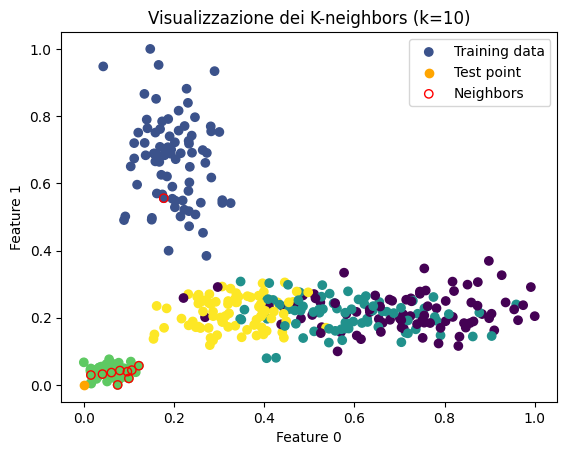

In [ ]:
k_neighbors = X_train[index_neighbors[0]]
plot_kneighbors(feature_x=0, feature_y=1, x=observation, k_neighbors=k_neighbors, X_train=X_train)